1) Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

2) Age: Positive Integer variable of the reviewers age.

3) Title: String variable for the title of the review.

4) Review Text: String variable for the review body.

5) Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

6) Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

7) Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

8) Division Name: Categorical name of the product high level division.

9) Department Name: Categorical name of the product department name.

10) Class Name: Categorical name of the product class name.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/Womens Clothing E-Commerce Reviews.csv")

In [ ]:
c=df['Review Text'].str.split(' ', expand=True)

In [ ]:
out = (
    df['Review Text'].str.get_dummies('/').sum()
        .rename('Review_Text')
        .reset_index(name='count')
        .sort_values('count', ascending=False, ignore_index=True)
)

In [ ]:
out

,index,count
0,28,12
1,27,5
2,winter,5
3,This sweater,5
4,shoulders,5
...,...,...
25677,I never would have thought that i could wear a...,1
25678,I never would have given these pants a second ...,1
25679,"I never owned an 'older' version, so nothing t...",1
25680,I never noticed this sweater online but when i...,1


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

# Data PreProcessing

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) #remove unnecessary columns from data


In [ ]:
df=df.drop_duplicates()

In [ ]:
df["Review Text"].isnull().sum()

825

In [ ]:
df.dropna(subset=['Review Text'], inplace= True)


In [ ]:
df["Review Text"].isnull().sum()

0

In [ ]:
df["Recommended IND"].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class Name               22627 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


# EDA 

In [ ]:
df["Recommended IND"].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

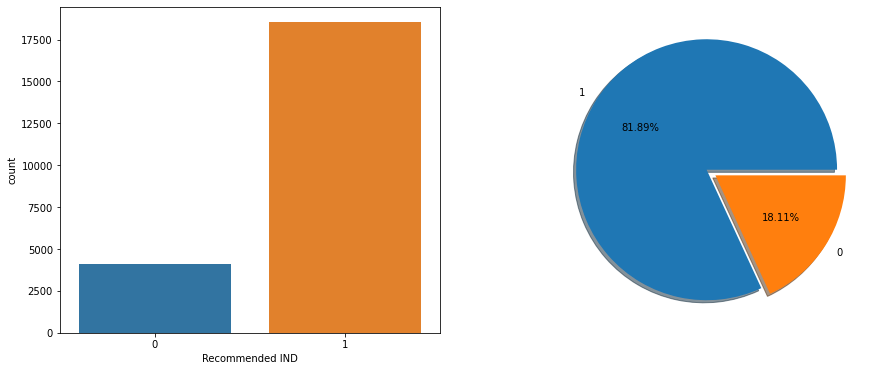

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Recommended IND'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Recommended IND'].value_counts(), labels = ("1","0"), explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

**Resampling**

In [ ]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Recommended IND']==1)] 
df_minority = df[(df['Recommended IND']==0)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class
                                 random_state=42)  # reproducible results
                                 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled['Recommended IND'].value_counts

<bound method IndexOpsMixin.value_counts of 4926     0
21598    0
17773    0
2579     0
19705    0
        ..
23479    1
23481    1
23482    1
23484    1
23485    1
Name: Recommended IND, Length: 34078, dtype: int64>

***After resampling***

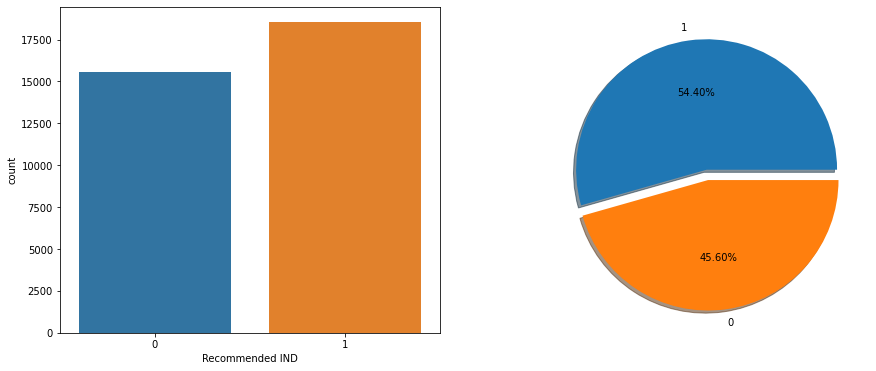

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df_upsampled['Recommended IND'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df_upsampled['Recommended IND'].value_counts(), labels = ("1","0"), explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

- 0 means "not recommended product", while 1 means "Recommeded product". 
- The above graph means that the majority of the store's products are recmmended for purchasing.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

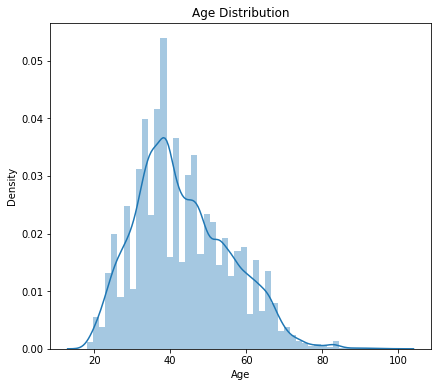

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Age_distribution')
sns.distplot(df['Age']).set_title("Age Distribution")

#  Preprocessing

In [ ]:
df.drop([ "Clothing ID","Age","Title","Rating","Positive Feedback Count","Division Name","Department Name","Class Name"], axis = 1, inplace = True) #remove unnecessary columns from data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22640 non-null  object
 1   Recommended IND  22640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
df["Review Text"].isnull().value_counts()

False    22640
Name: Review Text, dtype: int64

In [ ]:
df["Recommended IND"].isnull().value_counts()

False    22640
Name: Recommended IND, dtype: int64

# Text Manipulation

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

-Noise Removal (Punctuation)

In [ ]:
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

In [ ]:
processed_text=remove_punc(str(df["Review Text"]))
processed_text

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review Text Length 22640 dtype object'

# Tokenization

In [ ]:
def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

In [ ]:
tokenized_data=tokenizze(processed_text.lower())
tokenized_data

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 '22640',
 'dtype',
 'object']

# Removing Numbers

In [ ]:
def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num

In [ ]:
textwithoutnum= remove_num(tokenized_data)
textwithoutnum

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

Cleaning Data

In [ ]:
text = Cleaning_process(str(df["Review Text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

In [ ]:
df["Review Text"]= df["Review Text"].apply(Cleaning_process)

In [ ]:

df["Review Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

In [ ]:
df.head()

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


# ML  

Splitting data

In [ ]:
#importing 
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF are word frequency scores that try to highlight words that are more interesting,

In [ ]:
df_upsampled

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4926,1099,35,NaN,I am on the fence about this dress. the fabric...,3,0,26,General,Dresses,Dresses
21598,1086,33,Not great for those with a little extra...,I love everything by cloth & stone so was exci...,2,0,8,General,Dresses,Dresses
17773,819,67,NaN,"Loved the fit and colors, but the fabric is ve...",2,0,18,General,Tops,Blouses
2579,18,42,Disappointing quality,"I ordered these leggings and loved them, for a...",1,0,0,General Petite,Bottoms,Jeans
19705,999,48,Ugh,Not sure who this is for but its not for me. s...,1,0,0,General Petite,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...
23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
X = df_upsampled["Review Text"]
y= df_upsampled["Recommended IND"]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
X_train.shape , X_test.shape

((27262,), (6816,))

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_test_tf_idf.toarray().shape

(6816, 13061)

In [ ]:
X_train_tf_idf.toarray().shape

(27262, 13061)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,00,000,00p,02,03,03dd,04,06,0dd,0p,...,zippie,zipping,zips,zombie,zone,zoolander,zoom,zooming,zuma,ã¼ber
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.191052,0.0,0.0,0.0,0.0,0.0,0.0,0.180924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27258,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27259,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27260,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling 

In [ ]:
#import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
#importing validation models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

# Logistic Regression

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score
lr = LogisticRegression()
# Fit the model
lr.fit(X_train_tf_idf, y_train)
#predict x_test
pred_2 = lr.predict(X_test_tf_idf)

In [ ]:
Eval_lr= classification_task(lr,X_train_tf_idf, y_train ,X_test_tf_idf ,y_test,pred_2,"logisitc regression" )

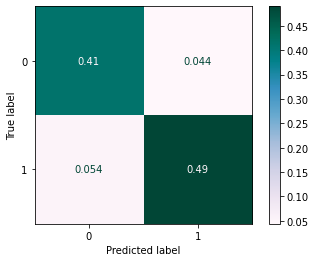

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_2 ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# SVM

In [ ]:
# Train the svc model on the scaled data and print the model score
svc = SVC(random_state=0,C=0.2,kernel='rbf')
#fitting model
svc.fit(X_train_tf_idf, y_train)
#predict
pred_svc = svc.predict(X_test_tf_idf)

In [ ]:
Eval_svc= classification_task(svc,X_train_tf_idf, y_train ,X_test_tf_idf ,y_test,pred_svc,"SVC" )

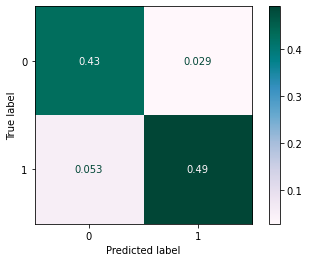

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_svc ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# Random Forest 

In [ ]:
# Train Random forest model on the scaled data
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(X_train_tf_idf,y_train)
#predict x_test_scaled
pred_rand = Random_Forest.predict(X_test_tf_idf)

In [ ]:
Eval_fores= classification_task(Random_Forest,X_train_tf_idf, y_train ,X_test_tf_idf ,y_test,pred_rand,"Random Forest" )

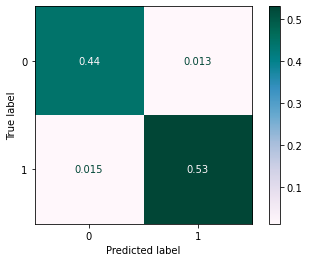

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_rand ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# Decision Tree 

In [ ]:
# Train decision tree model on the scaled data
Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(X_train_tf_idf,y_train)
#predict x_test_scaled
pred_ = Decision_Tree.predict(X_test_tf_idf)

In [ ]:
Eval_dec = classification_task(Decision_Tree,X_train_tf_idf, y_train ,X_test_tf_idf,y_test,pred_,"Decision Tree" )

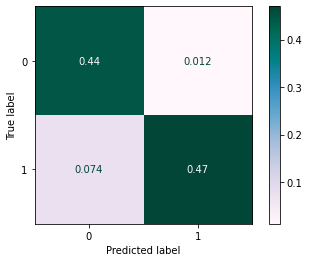

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_ ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)